In [18]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt


In [19]:

def collect_user_profile(path):
    
    user_profiles = [filename for filename in os.listdir(path) if filename.endswith('.json')]
    if not user_profiles:
        return
    user_dict_list = []
    for user_profile in user_profiles:
        user_full_path = path + user_profile
        with open(user_full_path, 'r') as f:
            data = json.load(f)
            userdict = {'user_id':data['id'], 'created_at':data['created_at'], 'followers_count':data['followers_count'], 'friends_count':data['friends_count'], 'listed_count':data['listed_count'], 'favourites_count':data['favourites_count'], 'geo_enabled':data['geo_enabled'],'verified':data['verified'],'statuses_count':data['statuses_count'],'has_extended_profile':data['has_extended_profile'] if 'has_extended_profile' in data else None, 'default_profile':data['default_profile']}
            user_dict_list.append(userdict)
        
        
    return pd.DataFrame(user_dict_list)


In [20]:
path = 'user_profiles/'
user_profiles = collect_user_profile(path)
user_profiles.head()

,user_id,created_at,followers_count,friends_count,listed_count,favourites_count,geo_enabled,verified,statuses_count,has_extended_profile,default_profile
0,2456180598,Mon Apr 21 08:08:36 +0000 2014,396,320,0,2262,True,False,10316,True,True
1,3107934600,Thu Mar 26 02:33:17 +0000 2015,646,211,137,38,False,False,22746,False,True
2,81254146,Sat Oct 10 01:50:18 +0000 2009,671,1876,36,139,False,False,44395,True,True
3,1151326477,Tue Feb 05 16:11:41 +0000 2013,3690,950,81,2551,True,False,5988,False,False
4,4159797754,Tue Nov 10 23:01:47 +0000 2015,3,3,0,2,False,False,1829,False,True


In [21]:
user_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463119 entries, 0 to 463118
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   user_id               463119 non-null  int64 
 1   created_at            463119 non-null  object
 2   followers_count       463119 non-null  int64 
 3   friends_count         463119 non-null  int64 
 4   listed_count          463119 non-null  int64 
 5   favourites_count      463119 non-null  int64 
 6   geo_enabled           463119 non-null  bool  
 7   verified              463119 non-null  bool  
 8   statuses_count        463119 non-null  int64 
 9   has_extended_profile  463111 non-null  object
 10  default_profile       463119 non-null  bool  
dtypes: bool(3), int64(6), object(2)
memory usage: 29.6+ MB


In [22]:
user_profiles.has_extended_profile.fillna(value = False)
user_profiles.has_extended_profile = user_profiles.has_extended_profile.astype(bool)

In [23]:
user_profiles.dtypes

user_id                  int64
created_at              object
followers_count          int64
friends_count            int64
listed_count             int64
favourites_count         int64
geo_enabled               bool
verified                  bool
statuses_count           int64
has_extended_profile      bool
default_profile           bool
dtype: object

In [24]:
def process_date(d):
    try:
        date = d.split(' ')
        month = date[1]
        day = date[2]
        time = date[3]
        year = date[-1]
        return (pd.to_datetime(year + '-' + month + '-' + day + ' ' + time))
    except:
        pass

In [26]:
user_profiles.created_at = user_profiles.created_at.apply(process_date)

In [30]:
# convert datetime to timestamp effectively
user_profiles.created_at = user_profiles.created_at.astype('int64') // 10**9

In [32]:
user_profiles.head()

,user_id,created_at,followers_count,friends_count,listed_count,favourites_count,geo_enabled,verified,statuses_count,has_extended_profile,default_profile
0,2456180598,1398067716,396,320,0,2262,True,False,10316,True,True
1,3107934600,1427337197,646,211,137,38,False,False,22746,False,True
2,81254146,1255139418,671,1876,36,139,False,False,44395,True,True
3,1151326477,1360080701,3690,950,81,2551,True,False,5988,False,False
4,4159797754,1447196507,3,3,0,2,False,False,1829,False,True


In [33]:
user_profiles.to_csv('user_profiles.csv', index = False, header = True)

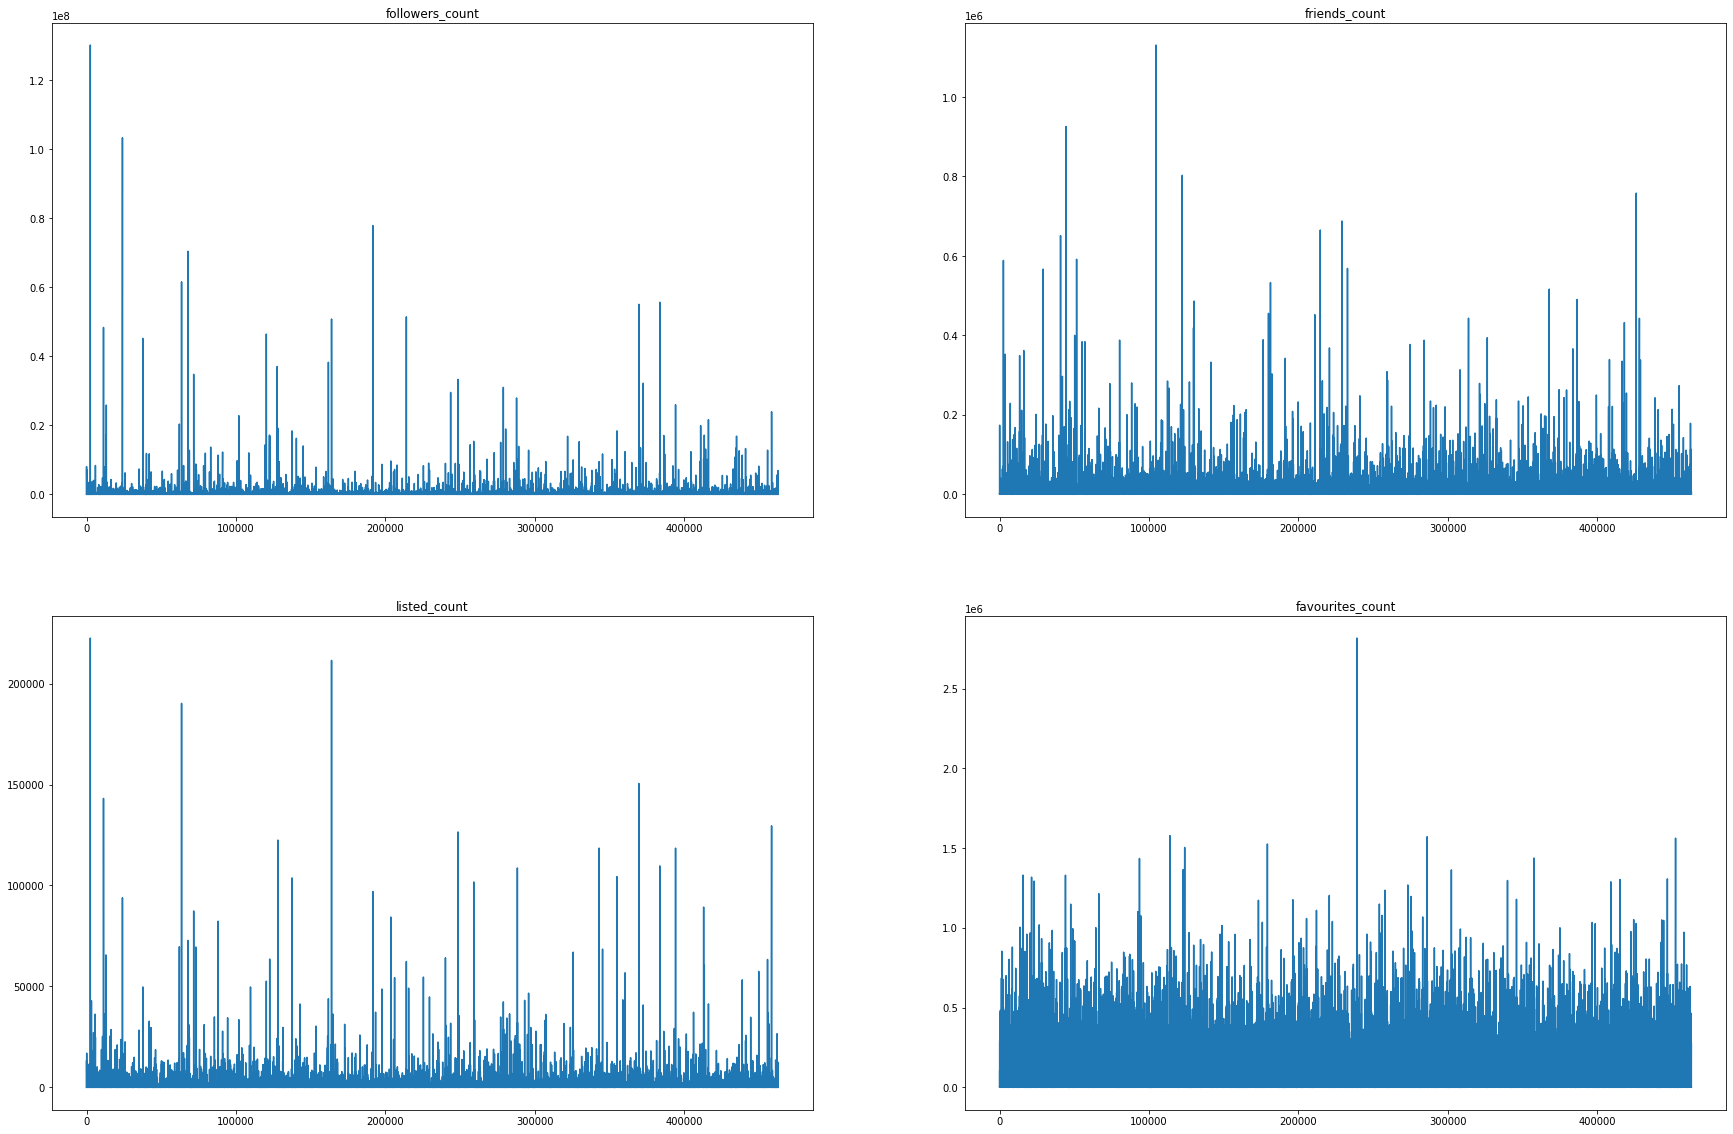

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (30,20))
user_profiles['followers_count'].plot(ax=axes[0,0])
axes[0,0].set_title('followers_count')

user_profiles['friends_count'].plot(ax=axes[0,1])
axes[0,1].set_title('friends_count')

user_profiles['listed_count'].plot(ax=axes[1,0])
axes[1,0].set_title('listed_count')

user_profiles['favourites_count'].plot(ax=axes[1,1])
axes[1,1].set_title('favourites_count')

plt.show()

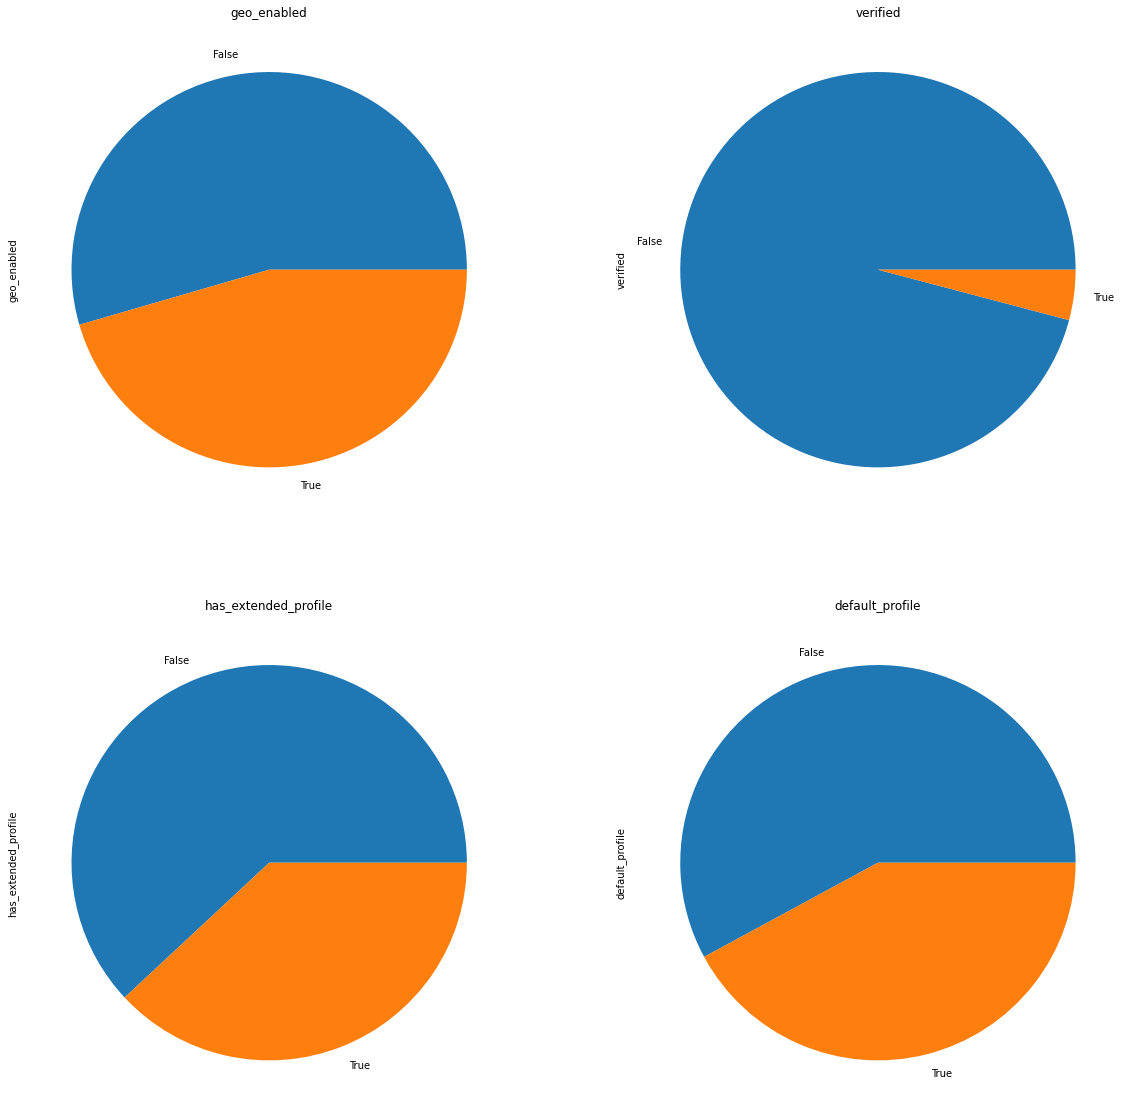

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (20,20))

user_profiles['geo_enabled'].value_counts().plot(ax=axes[0,0],kind = 'pie')
axes[0,0].set_title('geo_enabled')

user_profiles['verified'].value_counts().plot(ax=axes[0,1],kind = 'pie')
axes[0,1].set_title('verified')

user_profiles['has_extended_profile'].value_counts().plot(ax=axes[1,0],kind = 'pie')
axes[1,0].set_title('has_extended_profile')

user_profiles['default_profile'].value_counts().plot(ax=axes[1,1],kind = 'pie')
axes[1,1].set_title('default_profile')

plt.show()